## Nearest Neighbors for Classification and Regression
***

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print(iris_dataset.keys())

In [12]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + "\n...")
print("Target names: {}".format(iris_dataset['target_names']))
print("Feature names: \n{}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))
print("Target:\n{}".format(iris_dataset['target']))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five columns of data:
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, 
                                                   random_state=0, train_size=0.8, test_size=0.2)
print('X_train.shape: {}'.format(X_train.shape))
print('y_train.shape: {}'.format(y_train.shape))
print('X_train.shape: {}'.format(X_test.shape))
print('y_train.shape: {}'.format(y_test.shape))

X_train.shape: (120, 4)
y_train.shape: (120,)
X_train.shape: (30, 4)
y_train.shape: (30,)


Now we can visualize our data which is helpful to see what our data looks like.

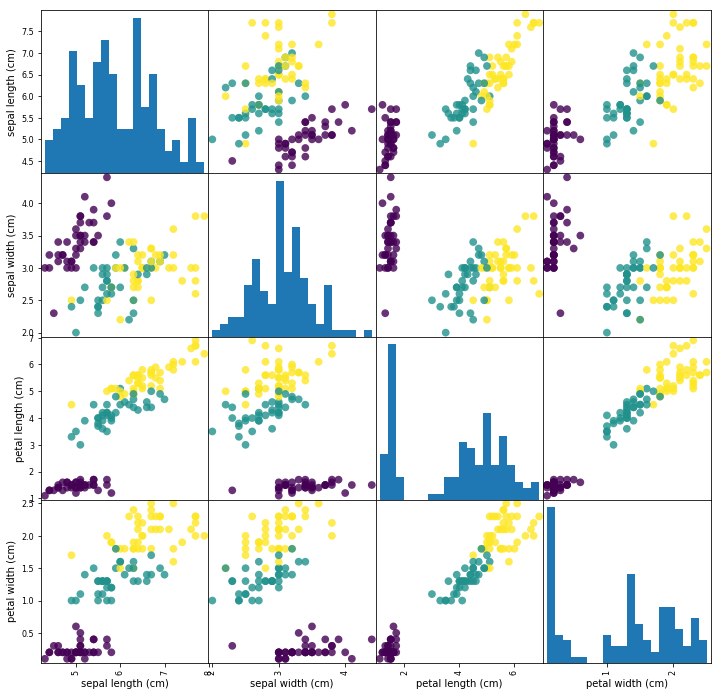

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(12,12), 
                            marker='o', hist_kwds={'bins':20}, s=60, alpha=.8)
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2],[4, 1.9, 3, 0.7]])
prediction = knn.predict(X_new)

print(iris_dataset.target_names[prediction])

['setosa' 'versicolor']


Now you have to see how well it does on the test data

In [17]:
y_pred = knn.predict(X_test)
print(np.mean(y_pred == y_test))

1.0


In [22]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test=\
train_test_split(X,y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

0.857142857143


### Underfitting and Overfitting
Some neighbor values may be underfitting or overfitting (modelling noise). 
For neighbors of 9 and 11 the boundaries are very smooth.However with 1 and 3 neighbors
The boundaries are rigid, which shows that the model is going out of its way to classify 
values that may be noise in the data.

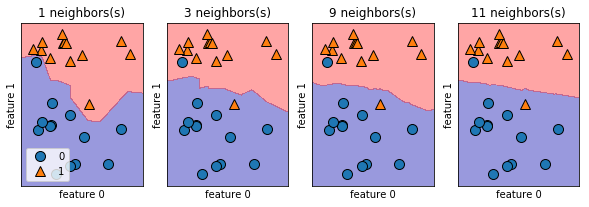

In [38]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,4,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9,11], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

### Testing accuracy vs testing accuracy

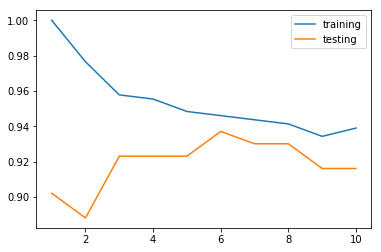

In [43]:
from sklearn.datasets        import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target,
        stratify=cancer.target, random_state = 66)
training_accuracy = []
testing_accuracy  = []

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))
plt.plot(range(1, 11), training_accuracy, label='training')
plt.plot(range(1, 11), testing_accuracy,  label='testing')
plt.legend()

plt.show()